**Clustering**

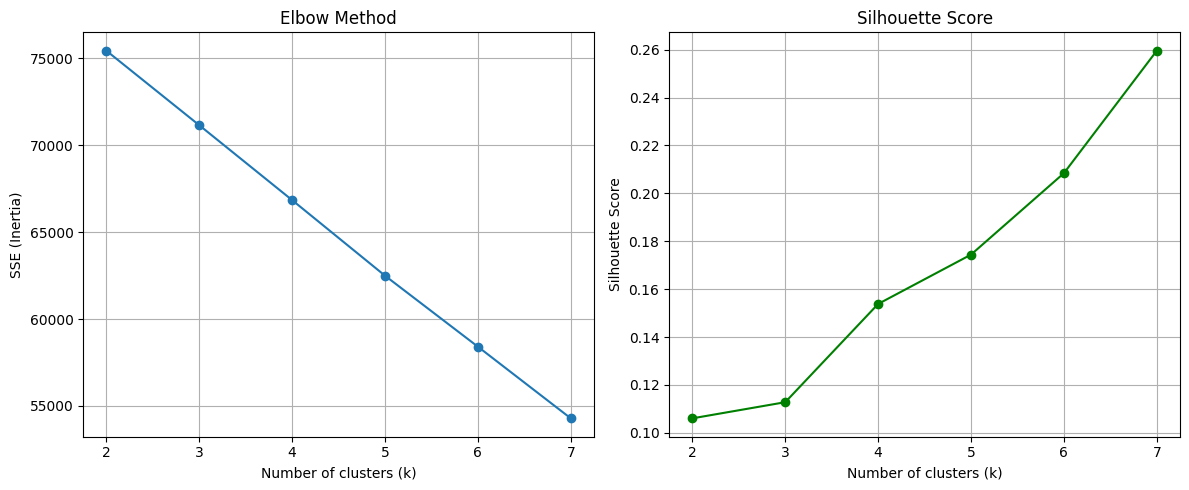

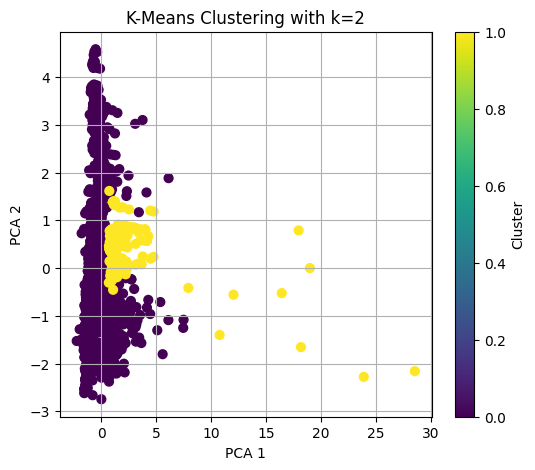

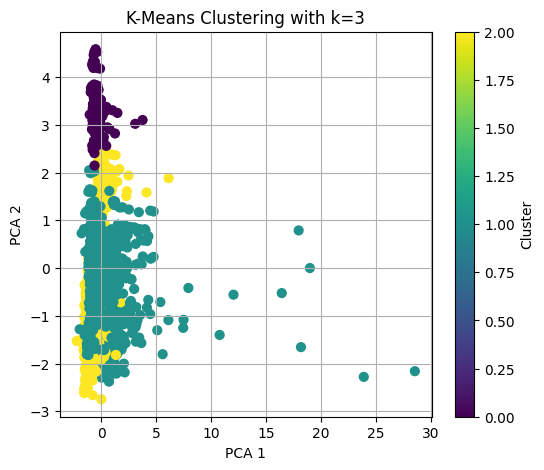

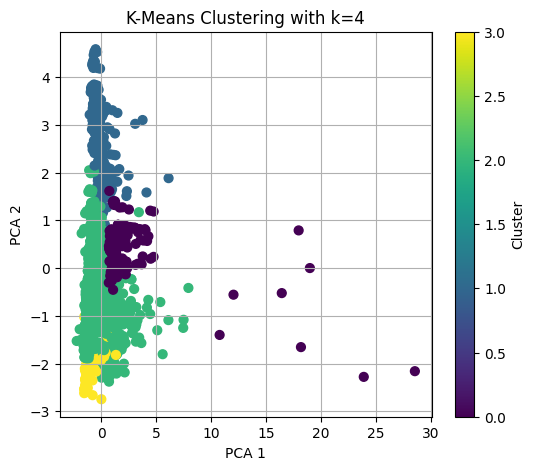

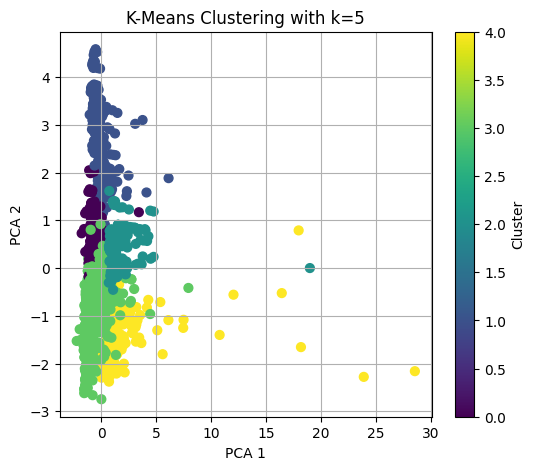

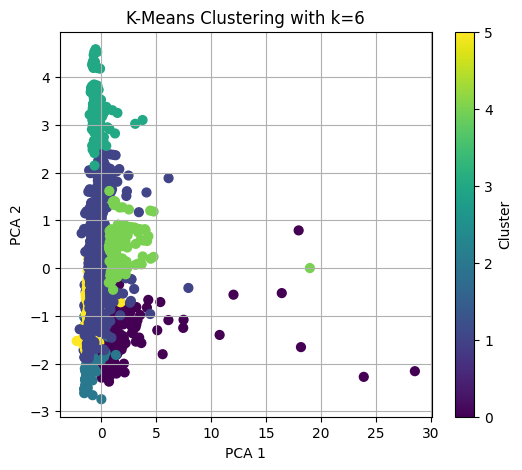

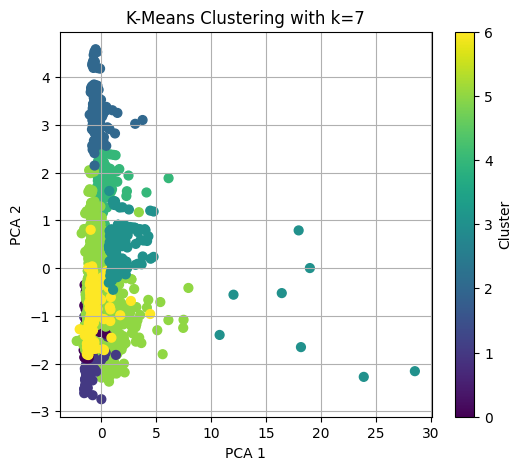

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


df = pd.read_csv("processed_data.csv")

#extract hour from Publication Time'
df['Hour'] = pd.to_datetime(df['Publication Time']).dt.hour

# drop columns
drop_cols = ['Video ID', 'Title', 'Publication Time']
df = df.drop(columns=drop_cols)

region_encoded = pd.get_dummies(df['Region'], prefix='Region')
df = df.drop(columns=['Region'])

#merge
features = pd.concat([df, region_encoded], axis=1)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# different values of K
K_range = range(2, 8)
sse = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Elbow, Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)


cluster_results = {}

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    cluster_results[k] = labels

    # Visualization of Cluster Distribution Using PCA for Each k
    plt.figure(figsize=(6, 5))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=40)
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()


In our clustering analysis, we explored various values of k ranging from 2 to 7 in order to determine the optimal number of clusters for our dataset. We evaluated K-Means using two key metrics: the Elbow Method and the Silhouette Score.

First, we used the Elbow Method, which shows the relationship between the number of clusters and the total within-cluster sum of squared errors (SSE). We noticed that the SSE decreases as the number of clusters increases. However, we typically look for the “elbow point,” where the decrease in error becomes less significant, suggesting that adding more clusters beyond this point offers only small improvements in accuracy while making the model more complex. In our case, there is no very clear elbow.

Second, we used the Silhouette Score, which shows how distinct and separate the clusters are, with values closer to 1 indicating better-defined clusters. In this plot, the silhouette scores are relatively low for k = 2 to 4, and begin to improve with each increase in k. The score increases significantly from k = 5 onward, and reaches its highest value at k = 7, indicating that the clusters at this level are the most cohesive and well-separated.

In summary, while the Elbow Method does not show a distinct elbow point, the Silhouette Score suggests that k = 7 provides the best clustering performance. Therefore, we conclude that k = 7 is the optimal number of clusters for our dataset based on the silhouette analysis.

